# Global UFO Sightings

### Dallas Rhoades

## Introduction

Are you an avid UFO hunter or have an interest in the mysterious and unknown? Do you want to gather evidence or simply see a UFO with your own eyes? Using the National UFO Reporting Center (NUFORC) dataset of UFO sightings around the world over the past 100 years, we can determine where in the world to go as well as the best time of year to go for UFO sightseeing. In this tutorial, we will walk through the five stages of the Data Science Pipeline using the aforementioned dataset. We will do some **Data Collection**, **Data Processing**, **Exploratory Analysis and Visualization**, **Hypothesis Testing/Machine Learning**, and finally a bit of **Insight and Policy Decision**.

## Setup

To be able to follow along with this tutorial, you will need the following:
- Python 3.x (usually already installed on macOS/Linux systems. For Windows click [here](https://www.python.org/downloads/windows/))
- Libraries:
    - [folium](https://folium.readthedocs.io/en/latest/)
    - [ggplot](http://ggplot.yhathq.com/)
    - [matplotlib](https://matplotlib.org/)
    - [numpy](http://www.numpy.org)
    - [pandas](http://pandas.pydata.org/)
    - [seaborn](https://seaborn.pydata.org/index.html)
    - [sklearn](http://scikit-learn.org/stable/)
    - [statsmodels](http://www.statsmodels.org/stable/index.html)
    - [timestring](https://pypi.python.org/pypi/timestring)
    
- UFO Sightings Dataset from Kaggle - https://www.kaggle.com/NUFORC/ufo-sightings

## Part 1: Getting Started - Data Collection

Before we start diving into the data collection, we can add all of the necessary library imports now so we have access to everything we'll need later. We'll go over the libraries in more detail as we use them. The ```!pip install ___``` commands are used in case your environment does not currently have certain libraries installed.

In [71]:
!pip install folium
!pip install ggplot
!pip install timestring
import datetime
import folium
from ggplot import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import statsmodels.formula.api as sm
import timestring
import warnings
warnings.filterwarnings('ignore')

----------------

First, we will need to download the dataset linked above. The download will be a comma-separated values files (CSV), a useful file type for data analysis. Once loaded, we can use the `DataFrame` datatype found in the pandas library to quickly and easily manipulate the data. The line of code below loads the dataset we downloaded into a `DataFrame`.

In [72]:
sightings_df = pd.read_csv('scrubbed.csv')

As you can see, the pandas library is extremely useful for working with data. It provides a lot of methods that make the process very seamless. We can use the `head()` function to view the first 5 rows of `sightings_df`.

In [73]:
sightings_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


We can see some of the data we will be working with here, including the date/time of the sighting, the country it was seen in, the shape of the UFO, and more. After confirming that our `DataFrame` was successfully created, we can conclude the first stage of the Data Science Pipeline: **Data Collection**.

## Part 2: Tidying Up - Data Processing

The next stage of the pipeline deals with **Data Processing**. This encompasses multiple things, including getting the data into a "tidy" format, making sure the data is in a form that actually makes sense, and more. During this part, we will walk through some possible ways to go about satisfying this criteria.

### Tidy Data

Tidy data is the concept of getting data into a format that makes analysis and manipulation easier. With this particular data set, much of the data is already in a tidy format. Let's explore the data set in more detail to see what's so tidy about it.

In [74]:
sightings_df.head(10)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


Remember that we've put this into a `DataFrame` type for easier manipulation. The first thing to note is that each column represents a specific attribute of the dataset. We have things like the datetime of the sighting, the city, state, and country it took place in, how long it lasted for, and more. Each row represents a sighting. A sighting is composed of an instance of each attribute. 

Another thing to note is that some columns appear to have been combined to make the dataset more compact while still retaining all the important information. For example, the `datetime` column is a combination of both a date and a time. These were likely separate columns before, but combining them reduces the number of columns without sacrificing any relevant data.

Despite the tidy appearance of this dataset, there are still some things we can improve. We can see that there is a `duration` column that corresponds to both seconds and hours/minutes. The 'hours/min' aren't as useful to us as the 'seconds' because the data in that column is a mix of minutes and hours. The data doesn't have uniformity. This will make calculations more difficult than they need to be in the future. The 'seconds' column is all in seconds, without fractions or additional labels of 'hours' and 'minutes' tacked on. We can always calculate the hours or minutes using this seconds value down the line if necessary. Since the 'seconds' column is more uniform, it makes sense to remove the 'hours/min' version of the `duration`.

In [75]:
sightings_df = sightings_df.drop('duration (hours/min)', 1)
sightings_df.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


As you can see, the `drop` function allows us to remove a column from the `DataFrame`. Its first parameter is the name of the column attribute, and the second parameter is the axis (0 for row, 1 for column). You can read more about this useful function [here](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.drop.html).

We can also remove the 'date posted' column since that is when the sighting was first posted on NUFORC's website (not when the sighting actually occurred).

In [76]:
sightings_df = sightings_df.drop('date posted', 1)
sightings_df.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611


Another thing to note is that the 'latitude' column actually has an extra space at the end of its name. We can confirm this with the following:

In [77]:
sightings_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'comments', 'latitude', 'longitude '],
      dtype='object')

This will confuse us later when we try to access the 'longitude' column, so let's take care of this now while it's on our mind.

In [78]:
sightings_df = sightings_df.rename(columns={'longitude ': 'longitude'})
sightings_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'comments', 'latitude', 'longitude'],
      dtype='object')

The dataset is more compact now and will be easier to work with later. It may be tempting to want to combine city, state, and maybe country into one column, but it's possible to make the data *too* tidy. If we leave it as is, it will actually be easier to work with later on when we're determining the best locations to go UFO hunting.

### Much Ado About NaN

In many datasets you'll find, `NaN` is often used to denote missing, incomplete, or unknown data. `NaN` is generally not a desirable value to have, and the easiest way to fix it is to simply drop any rows with that value in one of the columns. This solution has problems of its own, but luckily we will not be taking this route. With `NaN` values, it is often useful to take a look at *why* they are present in a given dataset. In our case, they appear if the location of the sighting does not have a state (if it's in a country other than the US) or if the sighting took place in a military area (e.g. Lackland Air Force Base). In these cases, I think leaving the `NaN` values is an acceptable practice.

------

Our `DataFrame` is looking good so far. We've now cleaned it up by removing data that's not needed and weighing the effects of removing `NaN` values or leaving them in. At this point, I think we've finished up the **Data Processing** stage of the pipeline and are ready to move on to stage 3.

## Part 3: Diving In - Exploratory Analysis and Visualization

This is the part where the *real* fun begins. We're now going to start analyzing our data for trends and patterns. This will give us a basis for formulating a hypothesis.

### Looking for Patterns: Time of Day

One possible pattern we can look for is the times of day sightings are more likely to occur. This will help us determine what times we should start looking for UFOs. To do this, we will need to parse the hour out of our datetime, group our data by the hour of the sighting (0-23) and then look at some statistical trends. The simplest way to get this hour is by using the built-in `.hour` field of the `datetime` datatype! After we get it, we can append it in a new column at the end of the `DataFrame` and use that for analysis.

In [79]:
# make a copy of the original dataframe
sightings_day = sightings_df.copy()
# get the hour value from each row's sighting
for idx, row in sightings_day.iterrows():
    try:
        sightings_day.loc[idx,'sighting_hour'] = timestring.Date(row['datetime']).hour
    except ValueError:
        row['datetime'] = row['datetime'].replace(' 24', ' 0')
        sightings_day.loc[idx, 'datetime'] = row['datetime'].replace(' 24', ' 0')
        sightings_day.loc[idx,'sighting_hour'] = timestring.Date(row['datetime']).hour


You'll notice above we surrounded our code in a try-except block. We did this because some of the 'hours' of the time were actually 24 instead of 0. The libraries we're using only accept 0 to 23 as possible hour values, and if we were to attempt to parse 24 it would throw an exception and halt. In this case, we catch the exception, assume that 24 is equivalent to 0, and change it before adding it to the `DataFrame`. We also modify the original 'datetime' hour from 24 to 0 to prevent future complications. It is fair to assume that since it is hour 24, it is technically midnight of the next day. However, this isn't explicitly stated anywhere and it won't affect our findings too much so we can safely say that it is midnight of the day in the actual datetime object. It is also fair to assume that this step could have been taken care of in the previous **Data Processing** stage. I chose to do it here because we are already iterating through the `DataFrame` anyway and looking specifically for the 'hour' value.

In [80]:
sightings_day.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude,sighting_hour
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111,20.0
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082,21.0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667,17.0
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833,21.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,20.0


It looks like the hour of the sighting was successfully parsed and put in the 'sighting_hour' column. Now we can group the rows by the hour and see the rough distribution of sightings based on the count per hour.

In [81]:
sightings_grouped_hrs = sightings_day.groupby('sighting_hour').sighting_hour.count().reset_index(name='count')
sightings_grouped_hrs

,sighting_hour,count
0,0.0,4802
1,1.0,3210
2,2.0,2357
3,3.0,2004
4,4.0,1529
5,5.0,1591
6,6.0,1224
7,7.0,905
8,8.0,803
9,9.0,958


We can now plot this data using the `matplotlib` library.

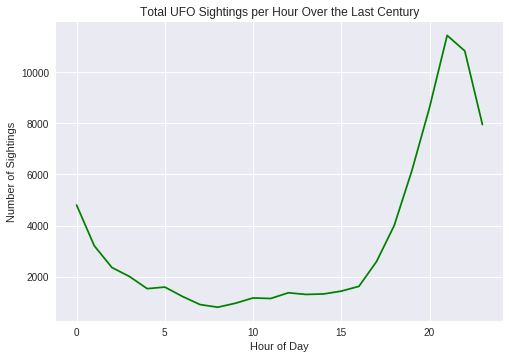

In [82]:
plt.plot(sightings_grouped_hrs['count'], color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sightings')
plt.title('Total UFO Sightings per Hour Over the Last Century')
plt.show()

By visualizing the data it is clear to see that the majority of sightings occur very late at night or in the very early morning hours.

### Calculating the Average Sightings per Hour

Another useful metric we can calculate is the average sightings per hour. This will take a bit more legwork than simply calculating the total sightings per hour. First, we need to extract the date from the datetime and put that in its own column.

In [83]:
grouped_sightings = sightings_day.copy()
grouped_sightings['datetime'] = pd.to_datetime(grouped_sightings['datetime'])
# get date from datetime
grouped_sightings['date'] = grouped_sightings['datetime'].dt.date
# group by date and number of sightings per each hour
grouped_sightings = grouped_sightings.groupby([grouped_sightings['date'], grouped_sightings['sighting_hour']], \
                                              as_index=True).sighting_hour.count().reset_index(name='count')
grouped_sightings.sort('count', ascending=False).head()

,date,sighting_hour,count
12065,1999-11-16,19.0,96
44404,2012-07-04,22.0,78
38580,2010-07-04,22.0,70
38579,2010-07-04,21.0,68
47559,2013-07-04,21.0,63


In [84]:
# calculate average per hour
avg_sightings = grouped_sightings.groupby([grouped_sightings['sighting_hour']], as_index=True).mean().reset_index()
avg_sightings[['sighting_hour', 'count']].head(8)

,sighting_hour,count
0,0.0,1.540584
1,1.0,1.304878
2,2.0,1.207480
3,3.0,1.190024
4,4.0,1.177059
5,5.0,1.218224
6,6.0,1.172414
7,7.0,1.125622


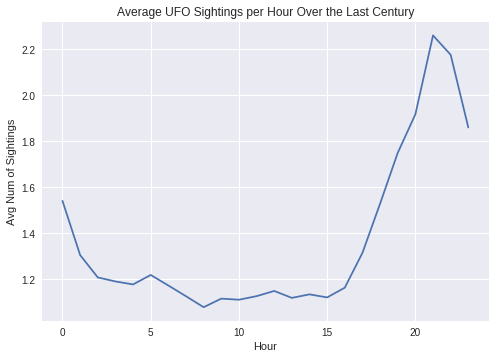

In [85]:
plt.plot(avg_sightings['count'])
plt.xlabel('Hour')
plt.ylabel('Avg Num of Sightings')
plt.title('Average UFO Sightings per Hour Over the Last Century')
plt.show()

This graph is more informative than the previous despite looking very similar. We can now get a clearer look at the *average* number of sightings each hour when compared to the total amount. Based on the average, we have more confidence that we have a greater chance of a UFO sightings in the late night hours. In fact, the average number of sightings between 9-11 PM is a little over 2. That's almost double the amount of sightings compared to any other time of day!

### Looking for Patterns: Time of Year

We can use a similar approach to determine the total number of sightings per month. We can use this data along with the most active time of day we just discovered to increase the accuracy of where we decide to look for UFOs.

In [86]:
sightings_month = sightings_day.copy()
# get the month from the datetime
for idx, row in sightings_month.iterrows():
    try:
        sightings_month.loc[idx,'sighting_month'] = timestring.Date(row['datetime']).month
    except ValueError: # 24th hour unchanged in sightings_day datetime. Ignore error
        row['datetime'] = row['datetime'].replace(' 24', ' 0') 
        sightings_month.loc[idx,'sighting_month'] = timestring.Date(row['datetime']).month
sightings_month.head()

,datetime,city,state,country,shape,duration (seconds),comments,latitude,longitude,sighting_hour,sighting_month
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,29.8830556,-97.941111,20.0,10.0
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082,21.0,10.0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667,17.0,10.0
3,10/10/1956 21:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,28.9783333,-96.645833,21.0,10.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,20.0,10.0


In [87]:
sightings_grouped_mths = sightings_month.groupby('sighting_month').sighting_month.count()
sightings_grouped_mths

sighting_month
1.0     5689
2.0     4665
3.0     5450
4.0     5527
5.0     5293
6.0     8152
7.0     9520
8.0     8636
9.0     7589
10.0    7407
11.0    6739
12.0    5665
Name: sighting_month, dtype: int64

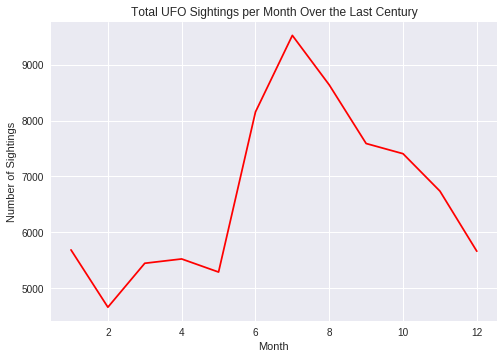

In [88]:
plt.plot(sightings_grouped_mths, color='red')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.title('Total UFO Sightings per Month Over the Last Century')
plt.show()

Based on our plot above, it looks like there is a large spike in sightings during the summer months, especially July. Activity tends to die down as we enter Winter (in the Northern Hemisphere) and the weather gets worse.

### Looking for Patterns: Location of Sighting

Let's look for one more pattern in our data. So far, we've learned that most sightings have taken place during the late night/early morning hours of the summer months. Let's try to find out *where* most of them have occurred. Luckily, we already have location data in our `DataFrame`, so we don't have to parse different parts of objects out like we've had to do with the datetime string. All we have to do is `groupby` the country count.

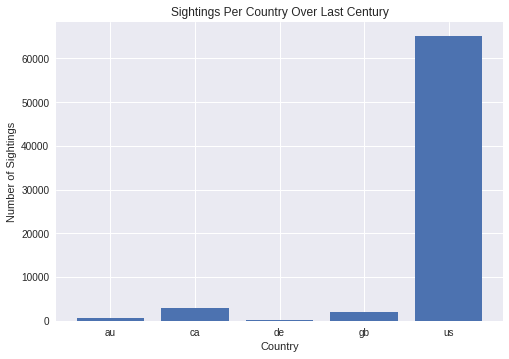

In [89]:
sightings_country = sightings_day.copy()
sightings_country = sightings_country.groupby('country').country.count()
# a bar graph would be more suited for this type of association
plt.bar(range(len(sightings_country)), list(sightings_country[:]), align='center')
plt.xticks(range(len(sightings_country)), list(sightings_country.keys()))
plt.title('Sightings Per Country Over Last Century')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.show()

It looks like the majority of sightings occur in the U.S. Let's zoom in on this further -- which five states do most sightings occur in?

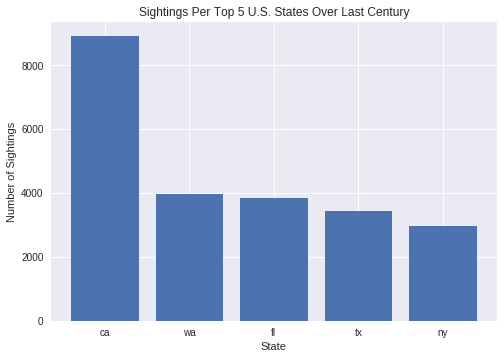

In [90]:
sightings_state = sightings_day.copy()
sightings_state = sightings_state.groupby('state').country.count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(5)
# a bar graph would be more suited for this type of association
plt.bar(range(len(sightings_state)), list(sightings_state['count']), align='center')
plt.xticks(range(len(sightings_state)), list(sightings_state['state']))
plt.title('Sightings Per Top 5 U.S. States Over Last Century')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.show()

Our exploratory analysis has led us to discover that California is the state with the most sightings, followed by Washington, Florida, Texas, and New York. Let's go one level deeper. Since California is the state with the most sightings, let's determine the top five cities within California that have the most reports.

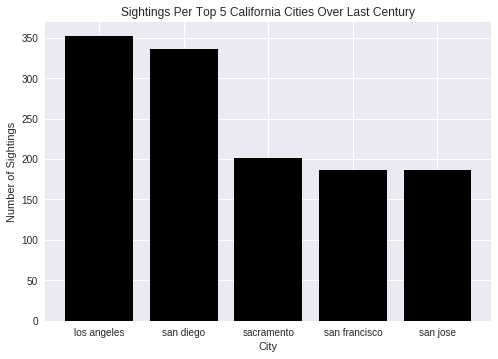

In [91]:
sightings_city = sightings_day.copy()
sightings_city = sightings_city[(sightings_city.state == 'ca')]
sightings_city = sightings_city.groupby('city').city.count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(5)
# again, a bar graph would be more suited for this type of association
plt.bar(range(len(sightings_city)), list(sightings_city['count']), align='center', color='black')
plt.xticks(range(len(sightings_city)), list(sightings_city['city']))
plt.title('Sightings Per Top 5 California Cities Over Last Century')
plt.xlabel('City')
plt.ylabel('Number of Sightings')
plt.show()

Los Angeles and San Diego are just about tied for the CA cities with the highest amount of sightings.

We've done a lot of analysis so far and learned quite a few useful things. To recap, by manipulating our dataset and plotting graphs as a visual reference point, we've learned that:
- The best time of day to go UFO searching is late in the evening to early in the morning (eyeballing it, I'd say from roughly 6 PM to 2 AM).
- The best time of the year to go is in the summer months, especially July.
- The country with the most reported sightings is the U.S.
- In the U.S., the cities with the most reported sightings include California, Washington, Florida, Texas, and NY.
- California has the most sightings by a large margin, so if you want to go searching there the best cities to search in or around are Los Angeles, San Diego, Sacramento City, San Francisco, or San Jose.

### Average Sightings per Month/Location

If we wanted to, we could follow the approach for calculating the average sightings per hour and tweak it a bit to apply for the other data analyses we did. For the purposes of our tutorial, we won't need to do this and instead we leave it as an exercise to the reader. If you're clamoring to do more exploratory analysis, here are some questions to think about after you successfully find the average(s):
- How similar are the graphs to the ones for the total sightings?
- Do these graphs provide more information than the ones for total sightings? What can we use them for?
- Do the averages calculated make sense in the context of the data?

### A Step Further - Mapping our Findings

In addition to the graphs we've created, we can use another cool library to display our findings: [folium](https://folium.readthedocs.io/en/latest/). This package allows us to visualize our data on a cool interactive map. Let's walk through a simple example of how to do this.

A good use of folium is plotting random samples of our data and trying to discern patterns from that. Since we already have the information for California sightings, let's use that and plot a random sample of 200 sightings and see what trends we can find.

In [102]:
sightings_city = sightings_day.copy()
sightings_city = sightings_city[(sightings_city.state == 'ca')]
# random sample of 200 sightings
samp = sightings_city.sample(200)
# create folium map with initial starting location
map_osm = folium.Map(location=[37.77, -119.42], zoom_start=6)
for idx, row in samp.iterrows():
    # highlight the marker if it's one of our top cities
    if (row['city'] == 'los angeles' or row['city'] == 'san diego' or row['city'] == 'sacramento City' \
        or row['city'] == 'san francisco' or row['city'] == 'san jose'):
        folium.Marker(location=[float(row['latitude']), float(row['longitude'])], popup=str(row['datetime']) + ' -- Shape: ' + str(row['shape']) + 
                      ' -- Duration: ' + str(row['duration (seconds)']) + ' seconds', 
                      icon=folium.Icon(color='green')).add_to(map_osm)
    else:
        folium.Marker(location=[float(row['latitude']), float(row['longitude'])], popup=str(row['datetime']) + ' -- Shape: ' + str(row['shape']) + 
                      ' -- Duration: ' + str(row['duration (seconds)']) + ' seconds', 
                      icon=folium.Icon(color='blue')).add_to(map_osm)
map_osm

Using this graph we can see the frequency in which sightings in the top 5 cities occur compared to other cities in California. The nice part is we can repeatedly take different samples and compare the results.

We've done a lot of analysis on our data and created a few helpful visual aids. I think we've done enough to close the curtain on the third stage of the Data Science Pipeline: **Exploratory Analysis and Visualization**. Next up, let's delve into what we can predict using our analysis in the fourth stage of the pipeline.

## Part 4: Predictive Powers - Hypothesis Testing and Machine Learning

Machine learning is useful for making predictions based on the data we've collected, processed, and analyzed. We will be using supervised machine learning in this tutorial. If you want a good explanation of the difference between supervised and unsupervised learning, there's a good Stack Overflow post about it [here](https://stackoverflow.com/questions/1832076/what-is-the-difference-between-supervised-learning-and-unsupervised-learning). In the supervised machine learning paradigm, we'll come up with a hypothesis that we want to test. We will use a training dataset to train a predictor, and then use that to predict the output of a test dataset.

### The Hypothesis

The first thing we need to do is come up with a hypothesis. Based on our dataset, what are some things we could predict? One thing we could try to predict is the number of sightings based on the hour of the day. Based on our analysis, a reasonable hypothesis would be: there is a relationship between the number of sightings and the time of day. The [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) in this case would be that there is *not* a relationship between the number of sightings and time of day. We will apply some machine larning algorithms to our dataset to determine if we can reject this null hypothesis or not.

### Training and Testing

We will first need to cut our data into two roughly similar distributions. These will be our training dataset and testing dataset. To ensure the cuts are similar in distribution, we will randomly shuffle our data before we split it. We will also put more data into the training set than the testing set. This will increase the accuracy of our training while still leaving a sufficient amount of data to test on. Let's put 75% of the data into the training set and the remaining 25% into the testing set.

In [103]:
# randomly shuffle the dataset
shuffled_sight = grouped_sightings.copy()
shuffled_sight = shuffle(shuffled_sight)
# 75-25 split
training = shuffled_sight[0:int(len(shuffled_sight) * (3/4))]
testing = shuffled_sight[int(len(shuffled_sight) * (3/4))::]
x_train = training['sighting_hour']
y_train = training['count']
# split the data
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(x_train, y_train, test_size = 0.25)

### Overfitting and Underfitting

We have to be careful when deciding on the degree of our function. If we choose one that's too small, it can lead to *underfitting* our training data, which can cause very poor performance all around. Conversely, if we choose a degree that's too high, it can lead to *overfitting* our training data, meaning it performs very well on the training data but very poorly on the testing data. If you want to learn more, Amazon has some pretty good documentation on the subject [here](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html). It goes over underfitting and overfitting in a bit more detail than I did here and also has some possible fixes if your data is overfitting or underfitting.

### K-Nearest Neighbors

The first Machine Learning algorithm we'll go over is K-Nearest Neighbors (KNN). This algorithm basically finds the *k* closest training samples in the feature space. It's also a lazy learning algorithm. For a more in-depth explanation I recommend reading the Wikipedia page on it [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). We'll be making heavy use of the [neighbors](http://scikit-learn.org/stable/modules/neighbors.html) module of [sci-kit learn](http://scikit-learn.org/stable/index.html). We'll test for K values from 1-15 and see what results we get.

In [104]:
# need to first reshape data to be able to fit them
X_train = X_train.reshape((len(X_train), 1))
Y_train = Y_train.reshape((len(Y_train), 1))
X_test = X_test.reshape((len(X_test), 1))
Y_test = Y_test.reshape((len(Y_test), 1))

for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    score = knn.score(Y_test, pred)
    print('K = ' + str(k) + ' Score: ' + str(score))

K = 1 Score: 0.200253753436
K = 2 Score: 1.0
K = 3 Score: 1.0
K = 4 Score: 0.897547050116
K = 5 Score: 0.929266229647
K = 6 Score: 0.897547050116
K = 7 Score: 1.0
K = 8 Score: 1.0
K = 9 Score: 1.0
K = 10 Score: 0.897547050116
K = 11 Score: 1.0
K = 12 Score: 1.0
K = 13 Score: 0.897547050116
K = 14 Score: 1.0
K = 15 Score: 1.0


It looks like our KNN regression has a pretty high accuracy rate for our data. This is just one machine learning algorithm, however. It is often advantageous to put the data through a second algorithm to compare the accuracy of the results.

### Tuning our Parameter

It is possible to get the best value of *k* using a technique called [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics). Specifically, we can use k-fold cross-validation, which will split our training data into a subset of training data and a subset of validation data. Specifically, it is split into *k* subsets, and *k-1* of those subsets are used for training. The remaining subset is used for validating the training set, and each subset is used for validation exactly once. Let's do a 10-fold cross-validation example to determine the best value for *k*. [This](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) blog post serves as a more complete guide for using cross-validation in KNN, and I'll be adopting some code from it for the example below.

Optimal number of neighbors: 23


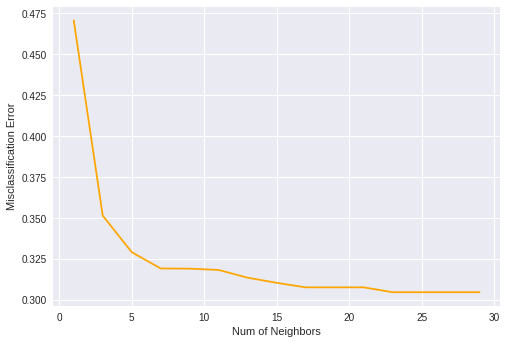

In [105]:
# creating odd list of K for KNN
myList = list(range(1,30))
y_train = Y_train.reshape(len(Y_train))
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = list(neighbors)
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("Optimal number of neighbors: %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE, color = 'orange')
plt.xlabel('Num of Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

Looks like the optimal *k* value was outside of the original range we chose! By using cross-validation, we were able to compensate for human error and find the actual *k* value that classifies our data rather than selecting the best one from an arbitrary range. We can see that as we increase the number of neighbors, the misclassification error decreases, but only to a point. The graph increases and decreases at a few different points, but ultimately hits a low point.

### Logistic Regression

The second machine learning algorithm we'll take a look at is called Logistic Regression. This algorithm has a categorical dependent variable and one or more independent variables. It measures the relationship between them by using the logit function. This is a very useful algorithm, and I highly recommend reading about it in more detail at its Wikipedia page [here](https://en.wikipedia.org/wiki/Logistic_regression). We'll follow a similar approach to the KNN algorithm above.

In [96]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
score = lr.score(Y_test, pred)
print('Score: ' + str(score))

Score: 1.0


Pretty similar accuracy to KNN! We can see that different machine learning algorithms can give different results on the same dataset. There are many other algorithms we can try, but we'll leave it at these two for now. It is important to recognize the pros and the cons of using the various algorithms on our dataset.

### To Reject or Not Reject

Our machine learning models are fairly accurate in determining the hours of the day in which a sighting will occur. Based on the scores of our models, I think it is safe to say that we can reject the null hypothesis. There's definitely a relationship between the hour of the day and number of UFO sightings. If our models had scored lower, it would cast some doubt on our hypothesis.

------

We've done a quick crash course in a couple of machine learning algorithms and applied them to our data. Based on all of our work so far, I think we're ready to go over the insights we can extract from this. Let's exit the **Hypothesis Testing and Machine Learning** stage and enter the fifth and final one.

## Part 5: Decisions, Decisions - Insight and Policy Decision

It's time to take all of the information we've gained in this tutorial and apply it to the real world. Let's do a recap of our goals and what we've done so far. We're on the hunt for evidence of UFOs, and we want to see them with our own eyes. We've used NUFORC's database of UFO sightings over the past century to determine the best location, time of year, and time of day to see one. After we gleaned these patterns from the data, we applied some machine learning algorithms to determine the accuracy of our hypothesis that there is a relationship between the hour of day and number of sightings.

### Where To Go From Here

Based off of our results, if we want the best chance of getting some evidence of UFOs (with a camera that actually takes decent quality pictures and videos so we can share it on the Internet), we should head to Los Angeles or San Diego during July and start surveying the skies around 6 PM and keep our eyes peeled until around 2 AM.

This information is useful and all, but on the surface it really only applies to people who want to go UFO searching. You may be wondering what to do if you're not in that subset of people. The good news is that this was just one instance of applying the **Data Science Pipeline** to a real world scenario. You can apply the steps in this tutorial to a wide array of different topics and problems. The actual data will change, but the core steps in each stage will remain largely  the same. In fact, we can even expand on the steps we ran through. For example, we can ask other, more detailed questions like what the best time to look for cylinder-shaped UFOs is, but excluding the Spring months because of our terrible allergies. The data science pipeline is very elastic, and it can answer a lot of questions we come up with and even ones we don't even think about asking.

## Conclusion

This tutorial serves as an example run through the Data Science Pipeline. We've used a lot of useful libraries, but despite this we still only utilized a small portion of their features. There are a *lot* more in these libraries, and they're continuing to grow very quickly. I highly recommend checking them all out in more detail and applying them to your own data science projects. Data science allows us to gain new insights from data that we wouldn't get from combing through it manually, and it will be used more and more for major decision making at all levels of society. Understanding how it works can only be beneficial.